# Time Series Forescasting

## ARIMA
ARIMA (Auto Regressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

In [18]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [19]:
df = pd.read_csv("../input/dow-jones-stock-price-prediction-datasets/merged_DJI.csv", index_col = 0)
stocks = df[df.Ticker == 'AAPL']

An ARIMA model is characterized by 3 terms p, d, q:
- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

In [20]:
price = stocks['Adjclose']
stocks.head()

,Timestamp,Volume,Open,Low,High,Close,Adjclose,Ticker
Date,,,,,,,,
2010-10-01 15:30:00,1285939800,448142800,10.219643,10.048214,10.235000,10.090000,8.719163,AAPL
2010-10-04 15:30:00,1286199000,435302000,10.057143,9.920357,10.103572,9.951428,8.599421,AAPL
2010-10-05 15:30:00,1286285400,501967200,10.071428,10.065000,10.337500,10.319285,8.917298,AAPL
2010-10-06 15:30:00,1286371800,670868800,10.342500,10.187857,10.428214,10.328215,8.925013,AAPL
2010-10-07 15:30:00,1286458200,408399600,10.369286,10.246786,10.374286,10.329286,8.925941,AAPL


Now we will transform our data into logarithmic format
because we are dealing in returns we want to make sure 
that the data is in the right format that will give us
more acurate estimates in term of return

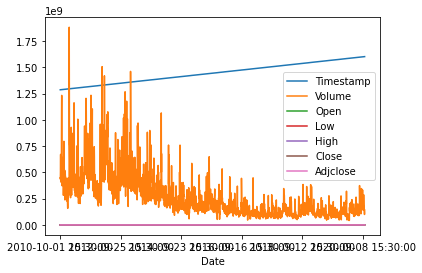

In [21]:
stocks.plot()

### Stationarity 
Substract the precious value from the current value. Now if we just diffrence once, we might not get a stationary series so we might need to do that multiple times.
And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

##### ADF Test
We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationay.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance leve (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.
So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [22]:
# Check if price series is stationary
result = ts.adfuller(stocks.Adjclose.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 2.9401550447159206
p-value: 1.0


##### Autocorrelation Function (ACF)

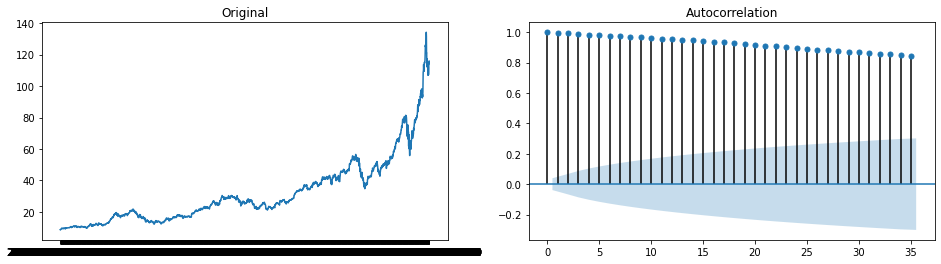

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(stocks.Adjclose)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(stocks.Adjclose, ax=ax2);

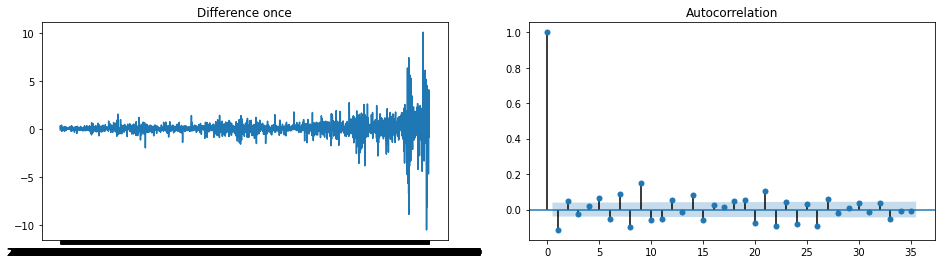

In [24]:
diff = stocks.Adjclose.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

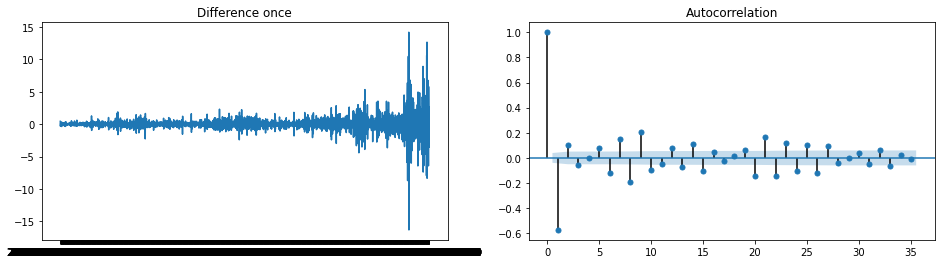

In [25]:
diff = stocks.Adjclose.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

We can use the pmdarima package to get the number of differencing.

###### p
p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

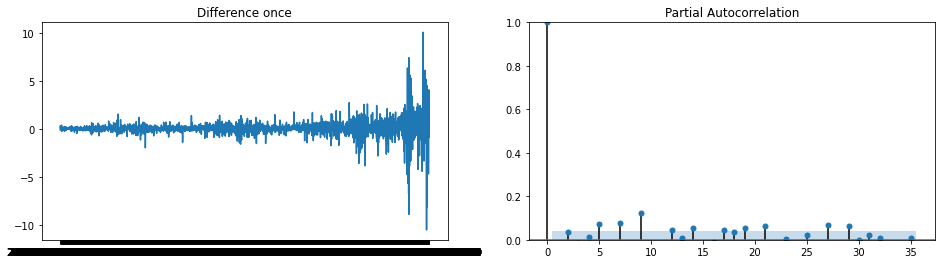

In [26]:
diff = stocks.Adjclose.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag of 6 is significant as it's above the significance line.

###### q
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms

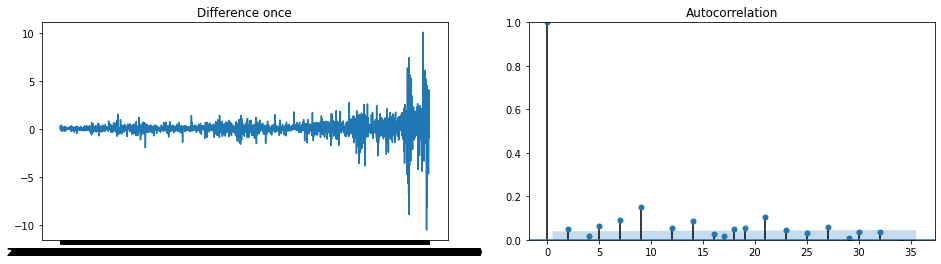

In [27]:
diff = stocks.Adjclose.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [28]:
model = ARIMA(stocks.Adjclose, order=(3,1,2))
model_fit = model.fit(disp=0)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Adjclose   No. Observations:                 2516
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3124.087
Method:                       css-mle   S.D. of innovations              0.838
Date:                Sun, 25 Oct 2020   AIC                           6262.173
Time:                        09:39:05   BIC                           6302.986
Sample:                             1   HQIC                          6276.986
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0427      0.019      2.237      0.025       0.005       0.080
ar.L1.D.Adjclose    -0.1852      0.070     -2.637      0.008      -0.323      -0.048
ar.L2.D.Adjclose     0.8485 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-10.7659325 ,  -8.69389861,  -6.62186472,  -4.54983082,
         -2.47779693,  -0.40576304,   1.66627086,   3.73830475,
          5.81033864,   7.88237253,   9.95440643]),
 <a list of 2516 Lists of Patches objects>)

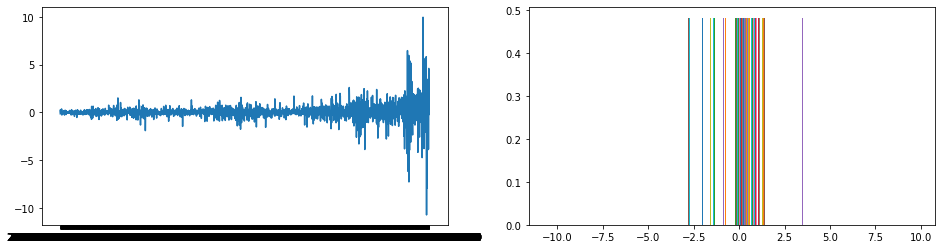

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

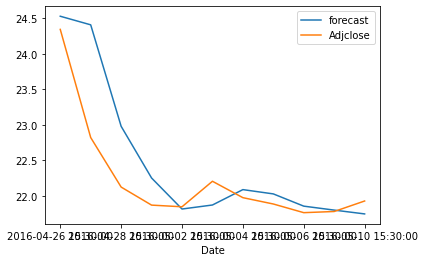

In [31]:
# Actual vs Fitted
model_fit.plot_predict(start=1400, end=1410, dynamic=False);